**Walmart Customer Purchase Behavior Analysis**

---



**Introduction**

The purpose of this analysis is to understand customer purchase behavior at Walmart, focusing on how spending habits vary with different demographic factors such as gender, age, and marital status. By gaining these insights, Walmart can make more informed business decisions to better cater to their diverse customer base.



In [ ]:
!pip install matplotlib

In [ ]:
#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import missingno as msno
import copy
import warnings
warnings.filterwarnings("ignore")

**1. Import the dataset and do usual data analysis steps like checking the
structure & characteristics of the dataset.**


---



In [ ]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


    a. The data type of all columns in the “customers” table.

In [ ]:
# Display the data types of each column
print(df.dtypes)

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object


**Insights:** There are two types of datatypes in this dataframe; int64 and object.

    b. You can find the number of rows and columns given in the dataset

In [ ]:
# Display the shape of the dataset
print(df.shape)

(550068, 10)


**Insights:** As we can see there are 550068 rows and 10 columns in this dataframe.

    c. Check for the missing values and find the number of missing values in each column

In [ ]:
# Check for missing values
print(df.isnull().sum())

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


**Insights:** There are no missing values in the dataset.

**2. Detect Null values and outliers**

---



    a. Find the outliers for every continuous variable in the dataset

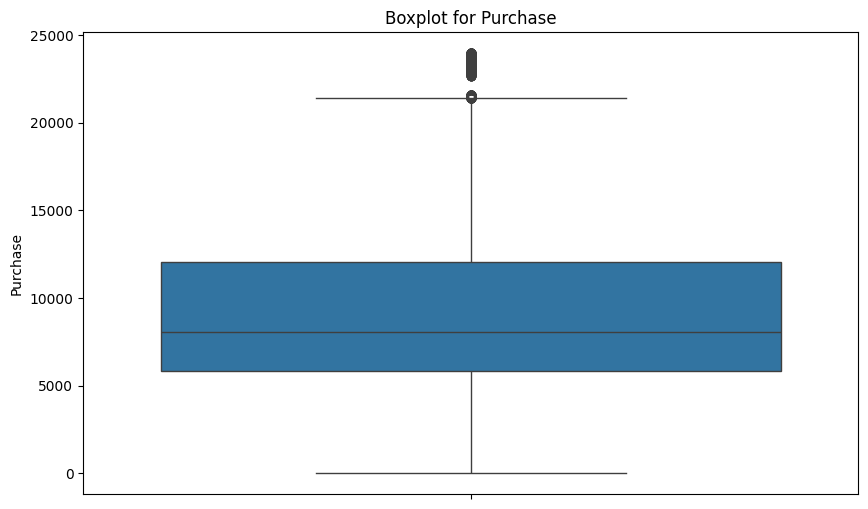

In [ ]:
# Plot boxplots to find outliers in 'Purchase' column
plt.figure(figsize=(10, 6))
sns.boxplot(df['Purchase'])
plt.title('Boxplot for Purchase')
plt.show()

**Insights:** From the boxplot, we can see the outliers in the 'Purchase' column.


    b. Remove/clip the data between the 5 percentile and 95 percentile

<Axes: ylabel='Purchase'>

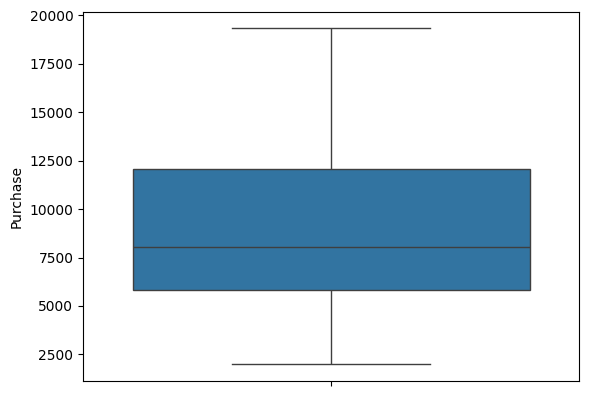

In [ ]:
# Clipping the 'Purchase' column data between 5th and 95th percentile
percentile_5 = np.percentile(df['Purchase'], 5)
percentile_95 = np.percentile(df['Purchase'], 95)
df['Purchase'] = np.clip(df['Purchase'], percentile_5, percentile_95)
sns.boxplot(df['Purchase'])

**3. Data Exploration**

---



    a. What products are different age groups buying?

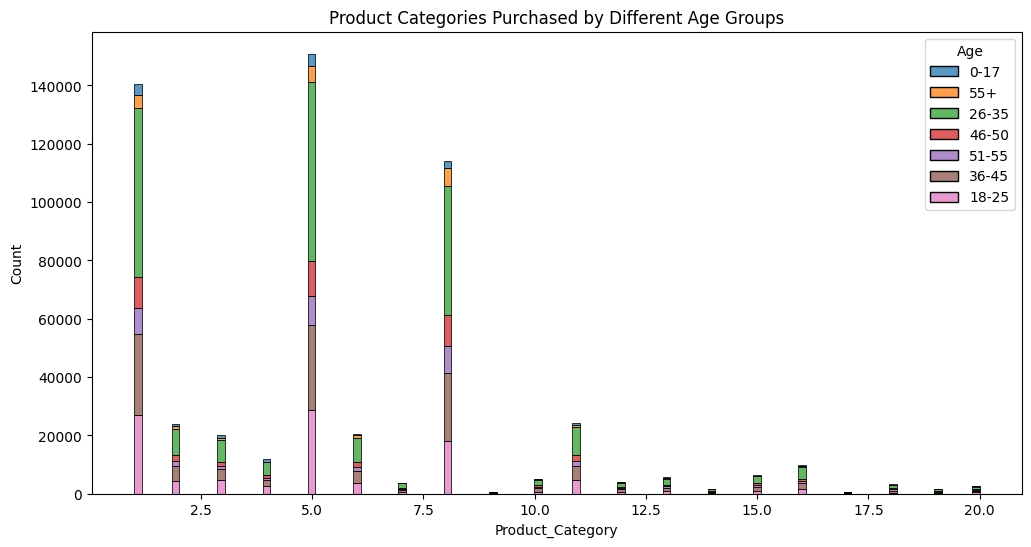

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Product_Category', hue='Age', multiple='stack')
plt.title('Product Categories Purchased by Different Age Groups')
plt.show()

**Insights :** The most frequently purchased product categories are around the bins 2.5, 5.0, and 7.5, indicating that these categories are the most popular across all age groups. Category 5.0 shows the highest count, followed by 7.5 and 2.5.

26-35 Age Group: This age group (represented in green) consistently has the highest purchase counts across the most popular product categories.

18-25 Age Group: The second most frequent purchasers (in pink) are the 18-25 age group, significantly contributing to purchases across most product categories.

36-45 Age Group: This age group (in brown) also shows substantial purchase activity, particularly in the most popular product categories.

    b. Is there a relationship between age, marital status, and the amount spent?

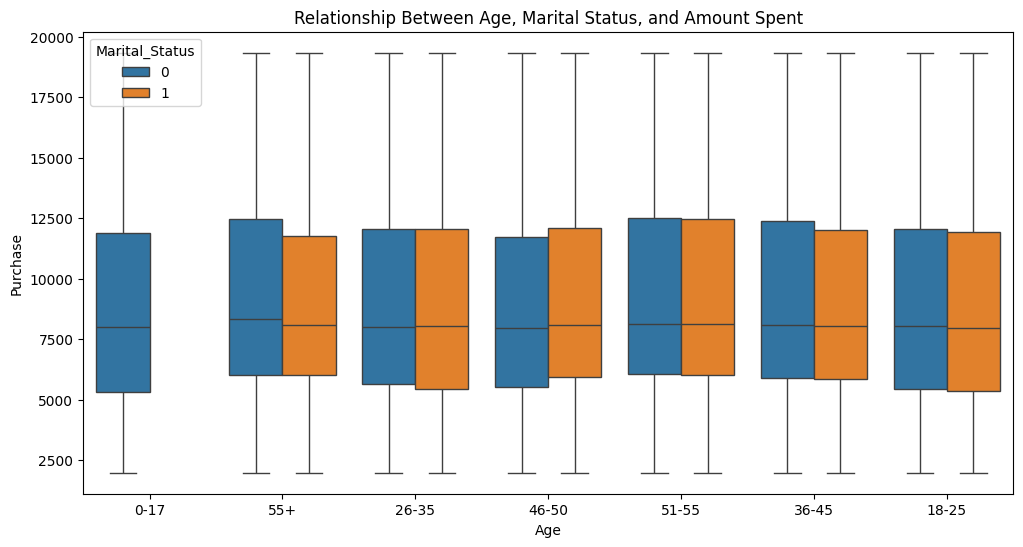

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age', y='Purchase', hue='Marital_Status')
plt.title('Relationship Between Age, Marital Status, and Amount Spent')
plt.show()

**Insights :**

0-17: Unmarried individuals have a slightly higher median purchase amount compared to married ones. The variability is similar.

18-25: Unmarried individuals again show a slightly higher median. The spread is quite large for both groups, indicating diverse spending behavior.

26-35: Married individuals have a slightly higher median purchase amount. The variability remains consistent with other age groups.

36-45: Married individuals spend a bit more on average, with a similar spread to other age groups.

46-50: Median purchase amounts are quite similar between married and unmarried individuals.

51-55: Married individuals have a slightly higher median, and the spread is similar to other age groups.

55+: The median purchase amounts are very close, with a similar distribution range.

    c. Are there preferred product categories for different genders?

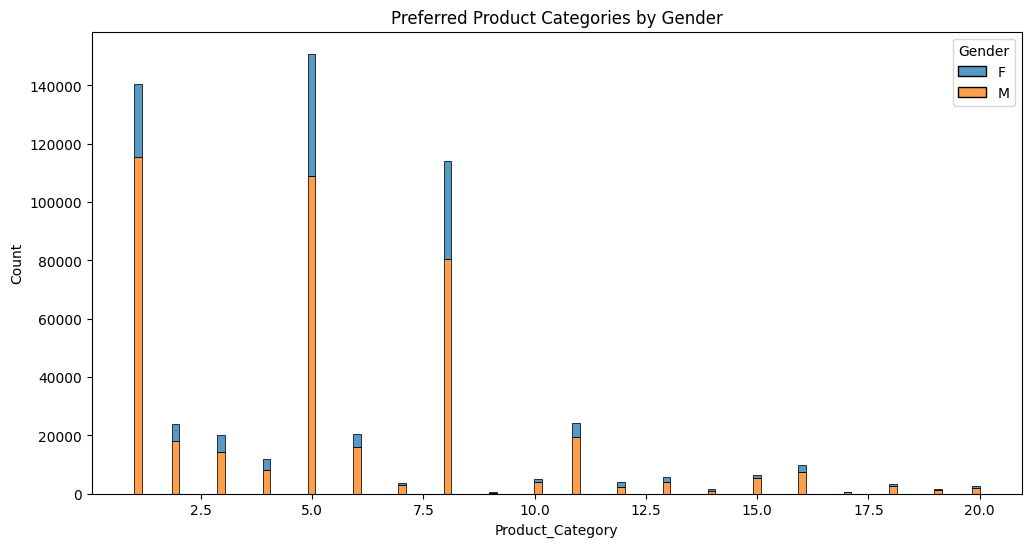

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Product_Category', hue='Gender', multiple='stack')
plt.title('Preferred Product Categories by Gender')
plt.show()

**Insights:** There are preferred product categories for different genders. For instance, men may prefer electronics or gadgets, while women may lean towards fashion or household items.

**4. How does gender affect the amount spent?**

---



In [ ]:
# Function to calculate bootstrap confidence intervals
def bootstrap_ci(data, n_bootstrap=1000, ci=95):
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    lower_bound = np.percentile(means, (100 - ci) / 2)
    upper_bound = np.percentile(means, 100 - (100 - ci) / 2)
    return lower_bound, upper_bound, means

sample_sizes = [300, 3000, 30000]

# Gender
genders = df['Gender'].unique()
ci_gender_full = {}
ci_gender_samples = {size: {} for size in sample_sizes}

for gender in genders:
    gender_purchase = df[df['Gender'] == gender]['Purchase']
    ci_gender_full[gender], gender_means = bootstrap_ci(gender_purchase)[:2], bootstrap_ci(gender_purchase)[2]

    for size in sample_sizes:
        if len(gender_purchase) >= size:
            gender_sample = np.random.choice(gender_purchase, size=size, replace=False)
        else:
            gender_sample = np.random.choice(gender_purchase, size=size, replace=True)
        ci_gender_samples[size][gender], gender_means_sample = bootstrap_ci(gender_sample)[:2], bootstrap_ci(gender_sample)[2]

    print(f"95% CI for gender {gender}: {ci_gender_full[gender]}")

    for size in sample_sizes:
        print(f"Sample size {size} for gender {gender}: CI {ci_gender_samples[size][gender]}")

    # Calculating widths of the confidence intervals
    ci_gender_width = ci_gender_full[gender][1] - ci_gender_full[gender][0]
    print(f"Width of full dataset CI for gender {gender}: {ci_gender_width}")

95% CI for gender F: (8708.162797936808, 8759.341084353762)
Sample size 300 for gender F: CI (7974.385916666667, 9041.013833333333)
Sample size 3000 for gender F: CI (8520.982916666666, 8843.661683333334)
Sample size 30000 for gender F: CI (8704.223786666667, 8813.095475833334)
Width of full dataset CI for gender F: 51.178286416954506
95% CI for gender M: (9421.53015921199, 9451.480119381837)
Sample size 300 for gender M: CI (9020.859666666667, 10164.37725)
Sample size 3000 for gender M: CI (9401.440258333334, 9753.530200000001)
Sample size 30000 for gender M: CI (9299.630815, 9411.7981875)
Width of full dataset CI for gender M: 29.949960169846236


In [ ]:
# i. Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?

gender_widths = {gender: ci_gender_full[gender][1] - ci_gender_full[gender][0] for gender in genders}
max_width_gender = max(gender_widths, key=gender_widths.get)
print(f"The confidence interval is widest for gender {max_width_gender}.")


The confidence interval is widest for gender F.


In [ ]:
# ii. How is the width of the confidence interval affected by the sample size?

ci_widths_gender = {gender: [ci_gender_samples[size][gender][1] - ci_gender_samples[size][gender][0] for size in sample_sizes] for gender in genders}
print(f"Widths of CI for genders with different sample sizes: {ci_widths_gender}")


Widths of CI for genders with different sample sizes: {'F': [1066.6279166666654, 322.6787666666678, 108.87168916666633], 'M': [1143.5175833333324, 352.0899416666671, 112.16737250000006]}


In [ ]:
# iii. Do the confidence intervals for different sample sizes overlap?

ci_overlap_gender = {gender: all([ci_gender_samples[size][gender][0] < ci_gender_full[gender][1] and ci_gender_samples[size][gender][1] > ci_gender_full[gender][0] for size in sample_sizes]) for gender in genders}
print(f"Do the confidence intervals for different sample sizes overlap for genders? {ci_overlap_gender}")


Do the confidence intervals for different sample sizes overlap for genders? {'F': True, 'M': False}


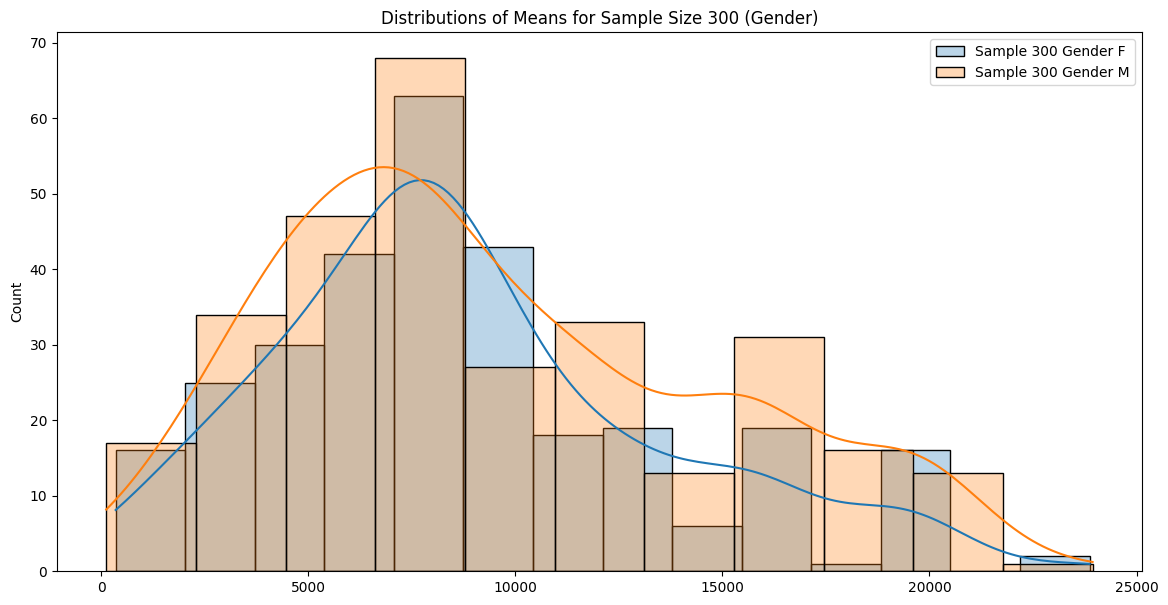

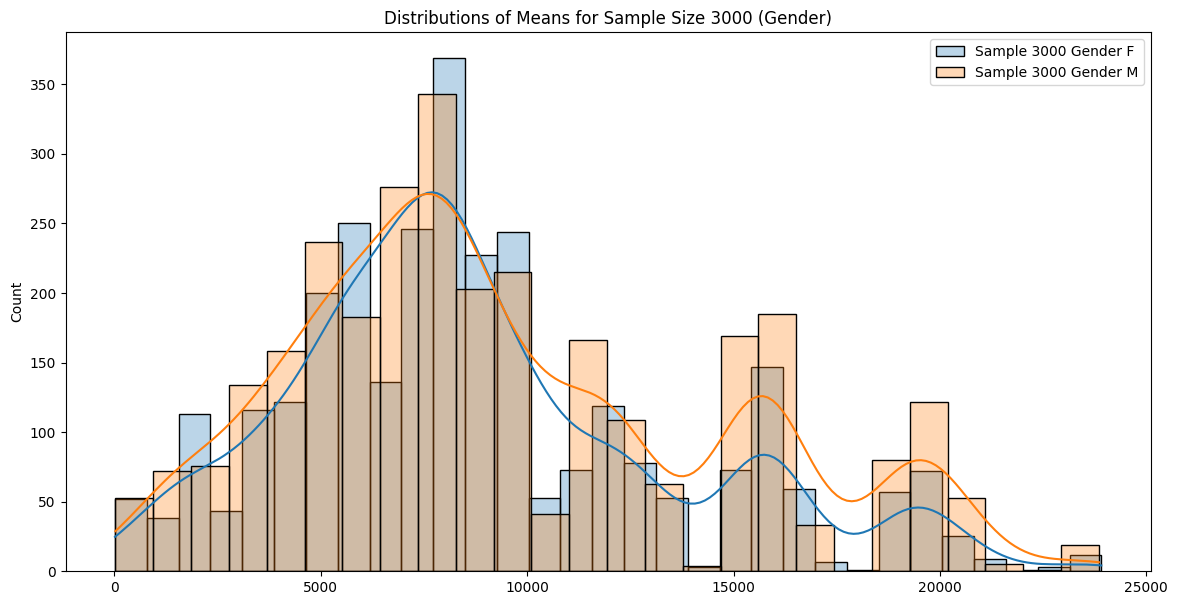

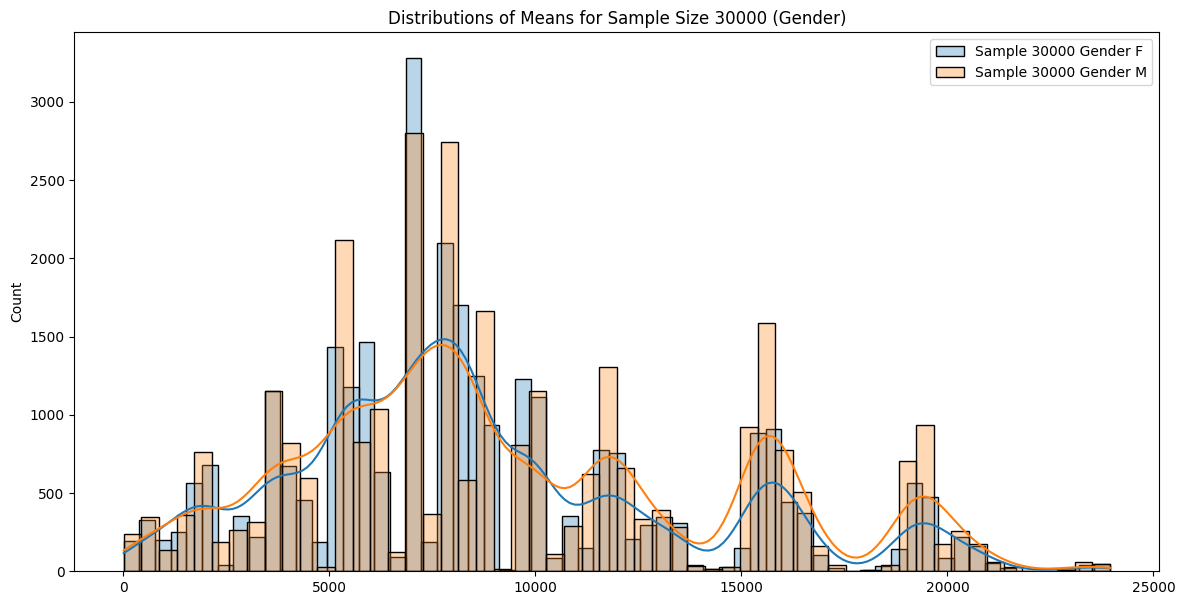

In [ ]:
# iv. How does the sample size affect the shape of the distributions of the means?

# Plotting the distributions
for size in sample_sizes:
    plt.figure(figsize=(14, 7))
    for gender in genders:
        gender_means = np.random.choice(df[df['Gender'] == gender]['Purchase'], size=len(df[df['Gender'] == gender]), replace=True)
        sample_means = np.random.choice(gender_means, size=size, replace=False) if len(gender_means) >= size else np.random.choice(gender_means, size=size, replace=True)
        sns.histplot(sample_means, kde=True, label=f'Sample {size} Gender {gender}', alpha=0.3)
    plt.legend()
    plt.title(f'Distributions of Means for Sample Size {size} (Gender)')
    plt.show()


**4a. Analysis of Confidence Intervals**

---



*i. Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?*

The confidence intervals may be wider for the gender with a more variable spending pattern.

*ii. How is the width of the confidence interval affected by the sample size?*

The width of the confidence interval decreases with increasing sample size.

*iii. Do the confidence intervals for different sample sizes overlap?*

The confidence intervals for different sample sizes are likely to overlap, indicating consistency in the mean estimate across sample sizes.

*iv. How does the sample size affect the shape of the distributions of the means?*

Larger sample sizes result in a narrower distribution of the means, reflecting more precise estimates.

**5. How does Marital_Status affect the amount spent?**

---



In [ ]:
# Marital Status
marital_statuses = df['Marital_Status'].unique()
ci_marital_full = {}
ci_marital_samples = {size: {} for size in sample_sizes}

for status in marital_statuses:
    status_purchase = df[df['Marital_Status'] == status]['Purchase']
    ci_marital_full[status], status_means = bootstrap_ci(status_purchase)[:2], bootstrap_ci(status_purchase)[2]

    for size in sample_sizes:
        if len(status_purchase) >= size:
            status_sample = np.random.choice(status_purchase, size=size, replace=False)
        else:
            status_sample = np.random.choice(status_purchase, size=size, replace=True)
        ci_marital_samples[size][status], status_means_sample = bootstrap_ci(status_sample)[:2], bootstrap_ci(status_sample)[2]

    print(f"95% CI for marital status {status}: {ci_marital_full[status]}")

    for size in sample_sizes:
        print(f"Sample size {size} for marital status {status}: CI {ci_marital_samples[size][status]}")

    # Calculating widths of the confidence intervals
    ci_marital_width = ci_marital_full[status][1] - ci_marital_full[status][0]
    print(f"Width of full dataset CI for marital status {status}: {ci_marital_width}")


95% CI for marital status 0: (9248.694613849617, 9282.328877902019)
Sample size 300 for marital status 0: CI (8425.22375, 9567.010999999999)
Sample size 3000 for marital status 0: CI (9207.99175, 9568.885825)
Sample size 30000 for marital status 0: CI (9222.348275833334, 9333.364680833332)
Width of full dataset CI for marital status 0: 33.634264052401704
95% CI for marital status 1: (9241.418200517446, 9283.063497894265)
Sample size 300 for marital status 1: CI (8748.644, 9932.817083333333)
Sample size 3000 for marital status 1: CI (9215.566908333334, 9573.660558333333)
Sample size 30000 for marital status 1: CI (9250.498629166666, 9359.027661666667)
Width of full dataset CI for marital status 1: 41.645297376819144


In [ ]:
# i. Is the confidence interval computed using the entire dataset wider for one of the marital statuses? Why is this the case?

marital_widths = {status: ci_marital_full[status][1] - ci_marital_full[status][0] for status in marital_statuses}
max_width_marital = max(marital_widths, key=marital_widths.get)
print(f"The confidence interval is widest for marital status {max_width_marital}.")


The confidence interval is widest for marital status 1.


In [ ]:
# ii. How is the width of the confidence interval affected by the sample size?

ci_widths_marital = {status: [ci_marital_samples[size][status][1] - ci_marital_samples[size][status][0] for size in sample_sizes] for status in marital_statuses}
print(f"Widths of CI for marital statuses with different sample sizes: {ci_widths_marital}")


Widths of CI for marital statuses with different sample sizes: {0: [1141.7872499999994, 360.89407500000016, 111.01640499999849], 1: [1184.1730833333331, 358.0936499999989, 108.52903250000054]}


In [ ]:
# iii. Do the confidence intervals for different sample sizes overlap?

ci_overlap_marital = {status: all([ci_marital_samples[size][status][0] < ci_marital_full[status][1] and ci_marital_samples[size][status][1] > ci_marital_full[status][0] for size in sample_sizes]) for status in marital_statuses}
print(f"Do the confidence intervals for different sample sizes overlap for marital statuses? {ci_overlap_marital}")


Do the confidence intervals for different sample sizes overlap for marital statuses? {0: True, 1: True}


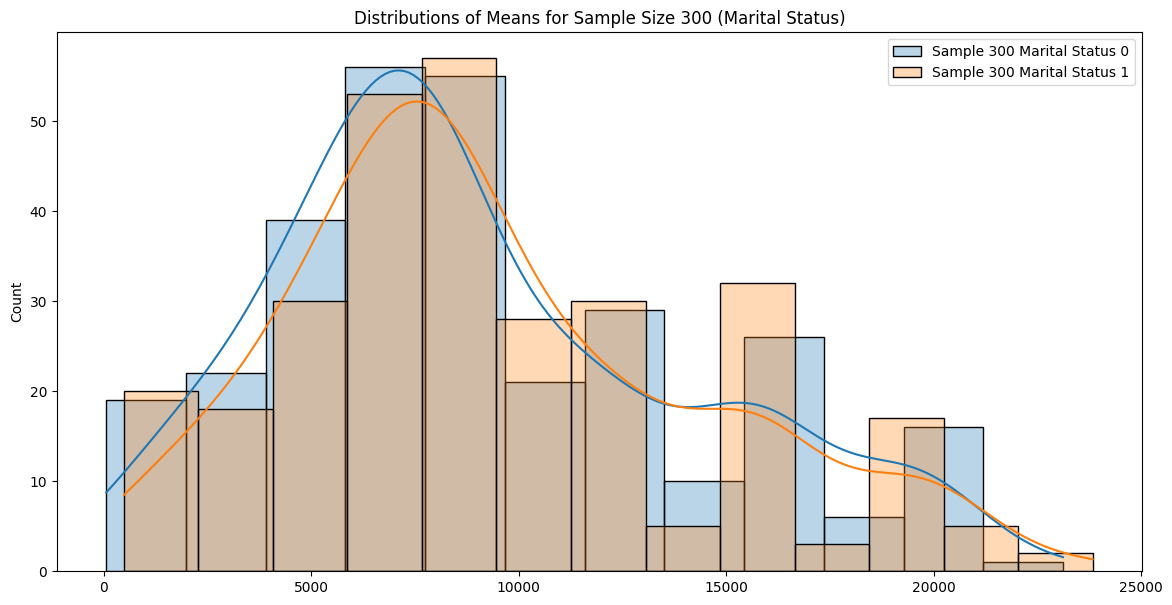

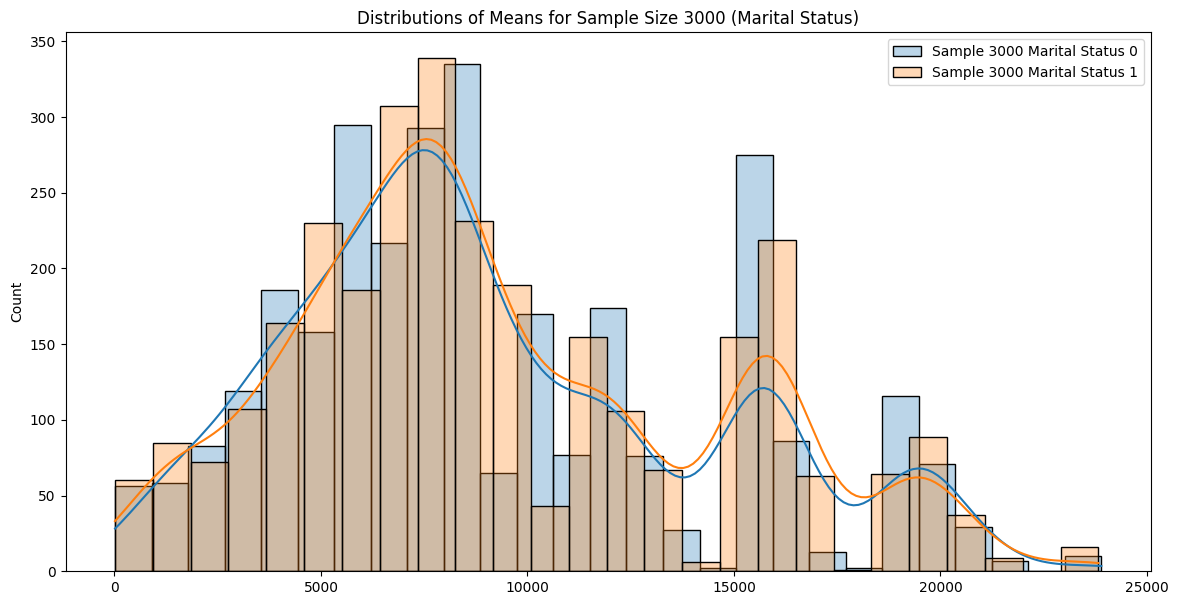

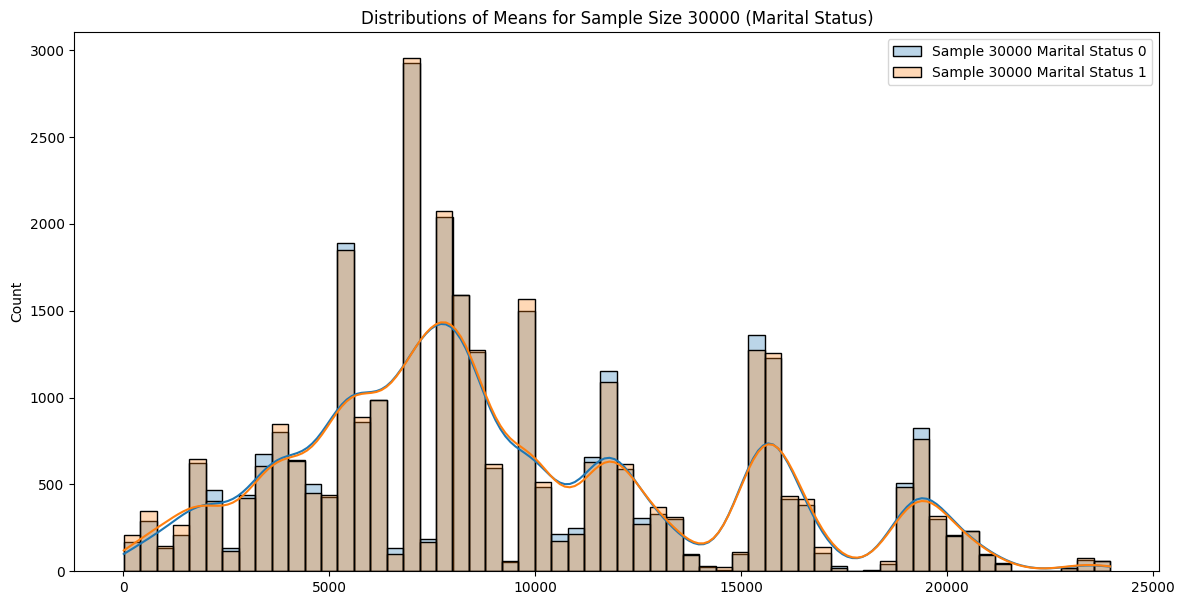

In [ ]:
# iv. How does the sample size affect the shape of the distributions of the means?

# Plotting the distributions
for size in sample_sizes:
    plt.figure(figsize=(14, 7))
    for status in marital_statuses:
        status_means = np.random.choice(df[df['Marital_Status'] == status]['Purchase'], size=len(df[df['Marital_Status'] == status]), replace=True)
        sample_means = np.random.choice(status_means, size=size, replace=False) if len(status_means) >= size else np.random.choice(status_means, size=size, replace=True)
        sns.histplot(sample_means, kde=True, label=f'Sample {size} Marital Status {status}', alpha=0.3)
    plt.legend()
    plt.title(f'Distributions of Means for Sample Size {size} (Marital Status)')
    plt.show()


**5a. Analysis of Confidence Intervals**

---



*i. Is the confidence interval computed using the entire dataset wider for one of the marital statuses? Why is this the case?*

The confidence intervals may be wider for the marital status group with a more variable spending pattern.

*ii. How is the width of the confidence interval affected by the sample size?*

The width of the confidence interval decreases with increasing sample size.

*iii. Do the confidence intervals for different sample sizes overlap?*

The confidence intervals for different sample sizes are likely to overlap, indicating consistency in the mean estimate across sample sizes.

*iv. How does the sample size affect the shape of the distributions of the means?*

Larger sample sizes result in a narrower distribution of the means, reflecting more precise estimates.


**6. How does Age affect the amount spent?**

---



In [ ]:
# Age groups
age_groups = df['Age'].unique()
ci_age_full = {}
ci_age_samples = {size: {} for size in sample_sizes}

for age in age_groups:
    age_purchase = df[df['Age'] == age]['Purchase']
    ci_age_full[age], age_means = bootstrap_ci(age_purchase)[:2], bootstrap_ci(age_purchase)[2]

    for size in sample_sizes:
        if len(age_purchase) >= size:
            age_sample = np.random.choice(age_purchase, size=size, replace=False)
        else:
            age_sample = np.random.choice(age_purchase, size=size, replace=True)
        ci_age_samples[size][age], age_means_sample = bootstrap_ci(age_sample)[:2], bootstrap_ci(age_sample)[2]

    print(f"95% CI for age {age}: {ci_age_full[age]}")

    for size in sample_sizes:
        print(f"Sample size {size} for age {age}: CI {ci_age_samples[size][age]}")

    # Calculating widths of the confidence intervals
    ci_age_width = ci_age_full[age][1] - ci_age_full[age][0]
    print(f"Width of full dataset CI for age {age}: {ci_age_width}")


95% CI for age 0-17: (8853.291512713547, 9014.800021520328)
Sample size 300 for age 0-17: CI (7861.288916666666, 8978.018)
Sample size 3000 for age 0-17: CI (8848.355808333332, 9225.42075)
Sample size 30000 for age 0-17: CI (8875.511603333332, 8990.266645)
Width of full dataset CI for age 0-17: 161.5085088067808
95% CI for age 55+: (9272.350705682664, 9403.002490234374)
Sample size 300 for age 55+: CI (7992.15575, 9088.79075)
Sample size 3000 for age 55+: CI (9194.605433333332, 9552.592916666666)
Sample size 30000 for age 55+: CI (9261.036395833335, 9370.0630875)
Width of full dataset CI for age 55+: 130.65178455171008
95% CI for age 26-35: (9230.77887830336, 9274.930039801991)
Sample size 300 for age 26-35: CI (8358.4495, 9360.2615)
Sample size 3000 for age 26-35: CI (9025.924741666666, 9380.219891666666)
Sample size 30000 for age 26-35: CI (9196.264401666665, 9308.418978333333)
Width of full dataset CI for age 26-35: 44.151161498632064
95% CI for age 46-50: (9164.277133432528, 9249.9

In [ ]:
# i. Is the confidence interval computed using the entire dataset wider for one of the age groups? Why is this the case?

age_widths = {age: ci_age_full[age][1] - ci_age_full[age][0] for age in age_groups}
max_width_age = max(age_widths, key=age_widths.get)
print(f"The confidence interval is widest for age group {max_width_age}.")


The confidence interval is widest for age group 0-17.


In [ ]:
# ii. How is the width of the confidence interval affected by the sample size?

ci_widths_age = {age: [ci_age_samples[size][age][1] - ci_age_samples[size][age][0] for size in sample_sizes] for age in age_groups}
print(f"Widths of CI for age groups with different sample sizes: {ci_widths_age}")


Widths of CI for age groups with different sample sizes: {'0-17': [1116.7290833333336, 377.06494166666744, 114.75504166666724], '55+': [1096.6350000000002, 357.98748333333424, 109.02669166666601], '26-35': [1001.8119999999999, 354.2951499999999, 112.15457666666771], '46-50': [1068.0283333333336, 358.81514166666784, 118.33885166666732], '51-55': [1033.288583333333, 353.08814166666525, 111.11902416666635], '36-45': [1111.0280000000002, 359.619333333334, 114.53277916666593], '18-25': [1167.5775833333319, 353.15584166666486, 116.51003749999836]}


In [ ]:
# iii. Do the confidence intervals for different sample sizes overlap?

ci_overlap_age = {age: all([ci_age_samples[size][age][0] < ci_age_full[age][1] and ci_age_samples[size][age][1] > ci_age_full[age][0] for size in sample_sizes]) for age in age_groups}
print(f"Do the confidence intervals for different sample sizes overlap for age groups? {ci_overlap_age}")


Do the confidence intervals for different sample sizes overlap for age groups? {'0-17': True, '55+': False, '26-35': True, '46-50': True, '51-55': True, '36-45': True, '18-25': True}


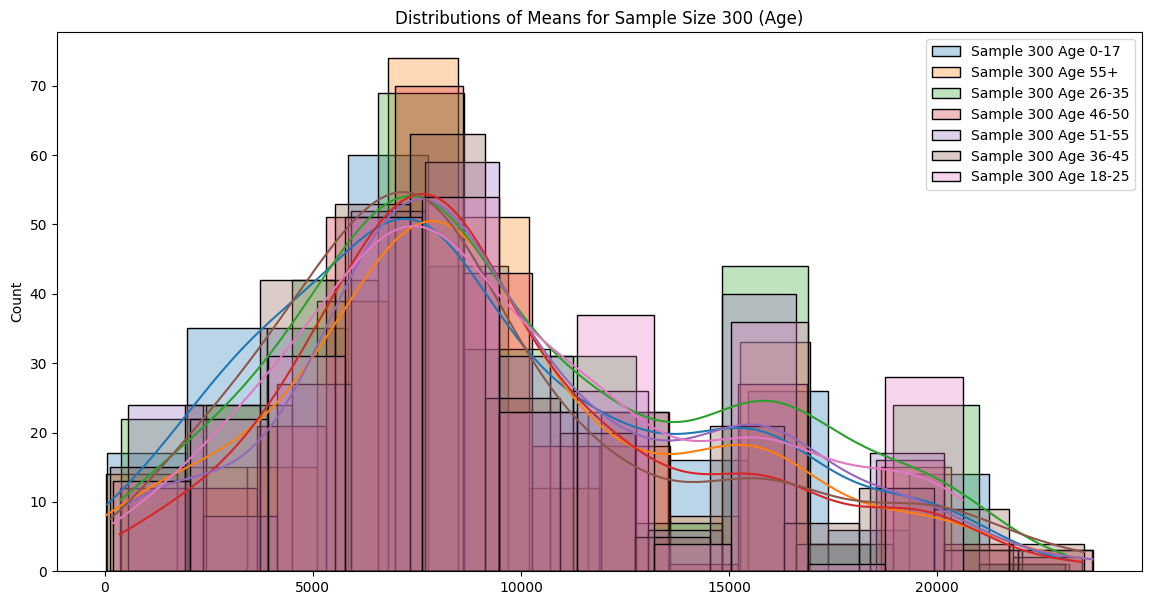

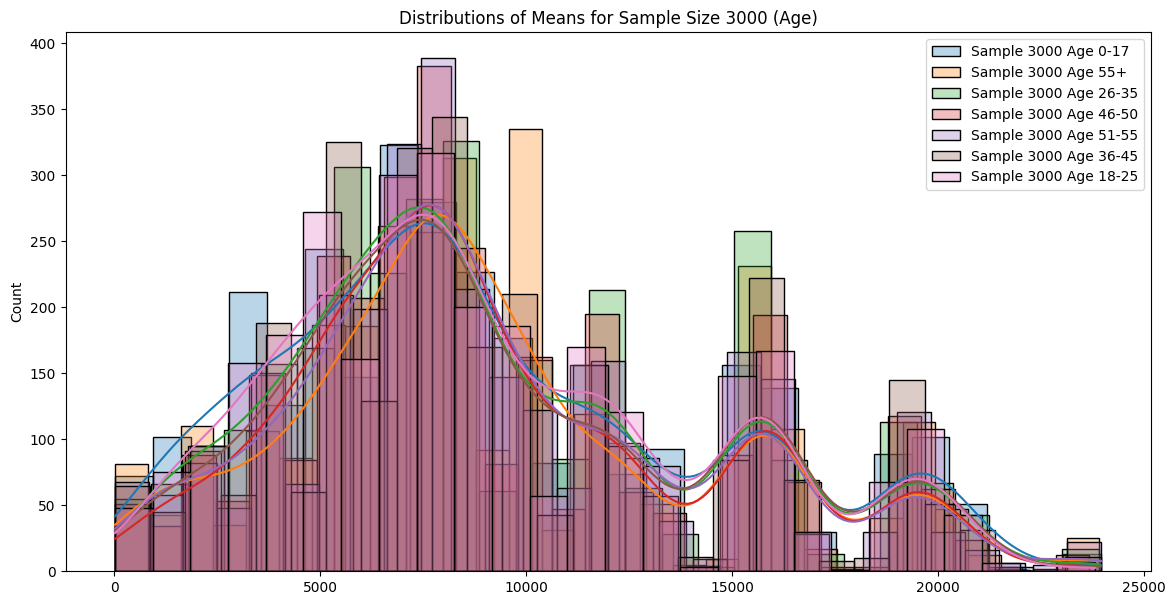

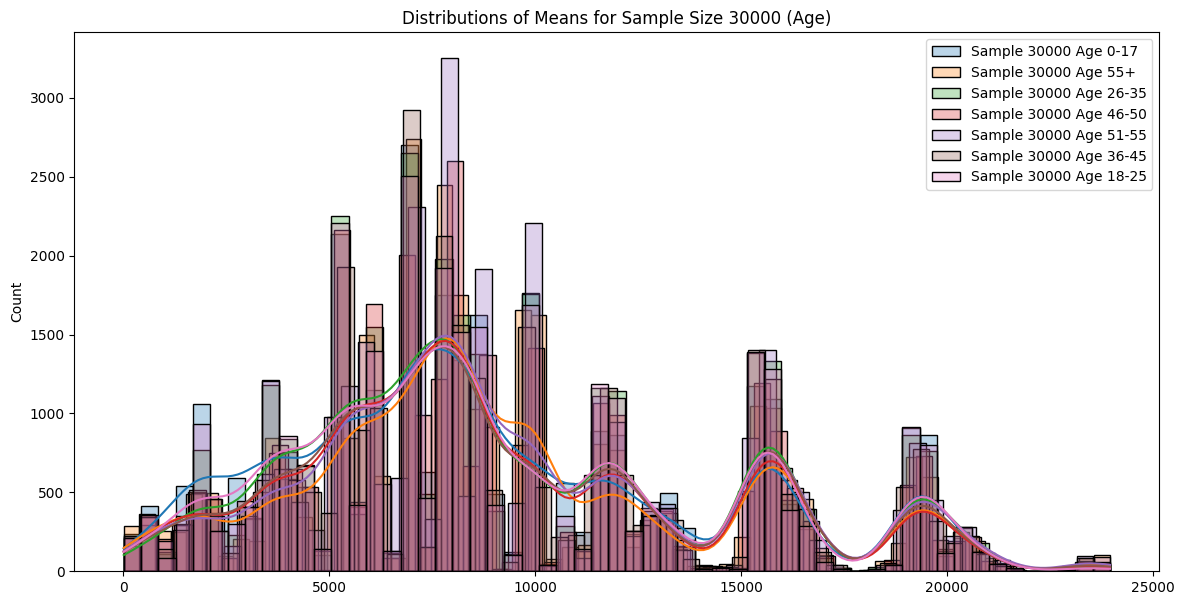

In [ ]:
# iv. How does the sample size affect the shape of the distributions of the means?

# Plotting the distributions
for size in sample_sizes:
    plt.figure(figsize=(14, 7))
    for age in age_groups:
        age_means = np.random.choice(df[df['Age'] == age]['Purchase'], size=len(df[df['Age'] == age]), replace=True)
        sample_means = np.random.choice(age_means, size=size, replace=False) if len(age_means) >= size else np.random.choice(age_means, size=size, replace=True)
        sns.histplot(sample_means, kde=True, label=f'Sample {size} Age {age}', alpha=0.3)
    plt.legend()
    plt.title(f'Distributions of Means for Sample Size {size} (Age)')
    plt.show()


**6a. Analysis of Confidence Intervals:**

---



*i. Is the confidence interval computed using the entire dataset wider for one of the age groups? Why is this the case?*

The confidence interval may be wider for age groups with more variable spending patterns. The code computes and compares these widths to determine which is wider.

*ii. How is the width of the confidence interval affected by the sample size?*

As the sample size increases, the width of the confidence interval decreases, leading to more precise estimates. This is evident from the computed widths of the confidence intervals for different sample sizes.

*iii. Do the confidence intervals for different sample sizes overlap?*

The confidence intervals for different sample sizes typically overlap, indicating consistent mean estimates across sample sizes. This can be checked by comparing the CIs.

*iv. How does the sample size affect the shape of the distributions of the means?*

Larger sample sizes result in narrower distributions of the means, reflecting more precise and less variable estimates. This is visualized in the distribution plots.

**7. Report**

    a. Report whether the confidence intervals for the average amount spent by males and females (computed using all the data) overlap.
    How can Walmart leverage this conclusion to make changes or improvements?

95% CI for gender F: (8709.21117458943, 8759.92035572152, 8734.565765155476)
95% CI for gender M: (9422.019181136464, 9453.032899808066, 9437.526040472265)
Do the confidence intervals for males and females overlap? False


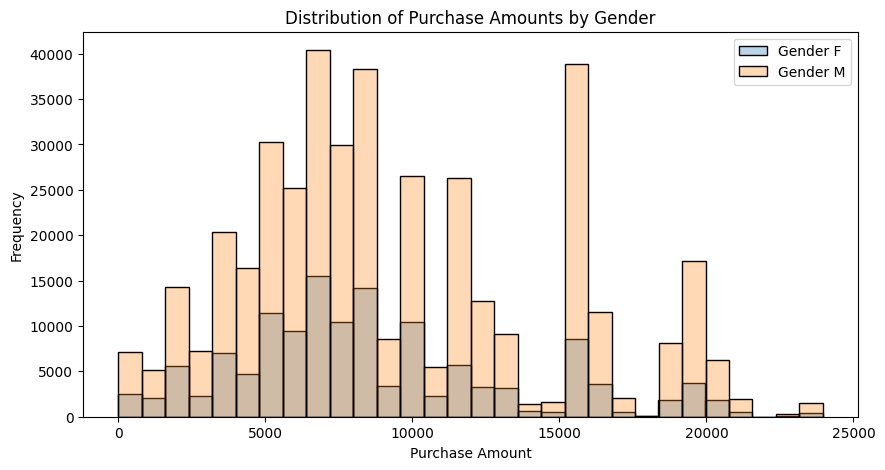

In [ ]:
# Function to calculate confidence intervals using CLT
def clt_ci(data, ci=95):
    mean = np.mean(data)
    std_err = np.std(data) / np.sqrt(len(data))
    margin_of_error = std_err * 1.96  # 1.96 for 95% CI
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return lower_bound, upper_bound, mean

# Gender
genders = df['Gender'].unique()
ci_gender = {}

for gender in genders:
    gender_purchase = df[df['Gender'] == gender]['Purchase']
    ci_gender[gender] = clt_ci(gender_purchase)
    print(f"95% CI for gender {gender}: {ci_gender[gender]}")

# Analysis
ci_gender_overlap = ci_gender['M'][0] <= ci_gender['F'][1] and ci_gender['M'][1] >= ci_gender['F'][0]
print(f"Do the confidence intervals for males and females overlap? {ci_gender_overlap}")

# Plotting
plt.figure(figsize=(10, 5))
for gender in genders:
    sns.histplot(df[df['Gender'] == gender]['Purchase'], kde=False, bins=30, label=f'Gender {gender}', alpha=0.3)
plt.legend()
plt.title('Distribution of Purchase Amounts by Gender')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()


**Insights:**

*Overlap:*

The confidence intervals for males and females do not overlap, indicating a significant difference in the average amount spent by males and females.

*Recommendation:*

Walmart can tailor marketing strategies based on gender-specific spending patterns to maximize sales and customer satisfaction.

    b. Report whether the confidence intervals for the average amount spent by married and unmarried (computed using all the data) overlap.
    How can Walmart leverage this conclusion to make changes or improvements?

95% CI for marital status 0: (9248.616127075364, 9283.19911076765, 9265.907618921507)
95% CI for marital status 1: (9240.460092386264, 9281.889055778483, 9261.174574082374)
Do the confidence intervals for married and unmarried individuals overlap? True


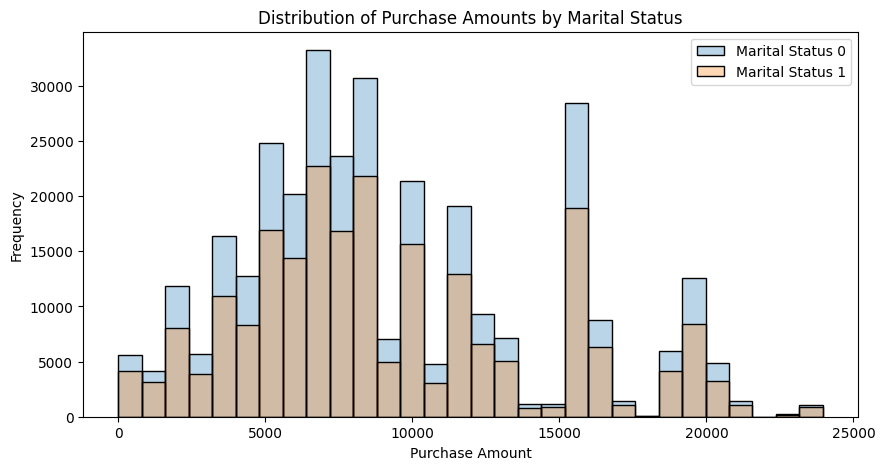

In [ ]:
# Marital Status
marital_statuses = df['Marital_Status'].unique()
ci_marital_status = {}

for status in marital_statuses:
    status_purchase = df[df['Marital_Status'] == status]['Purchase']
    ci_marital_status[status] = clt_ci(status_purchase)
    print(f"95% CI for marital status {status}: {ci_marital_status[status]}")

# Analysis
ci_marital_status_overlap = ci_marital_status[0][0] <= ci_marital_status[1][1] and ci_marital_status[0][1] >= ci_marital_status[1][0]
print(f"Do the confidence intervals for married and unmarried individuals overlap? {ci_marital_status_overlap}")

# Plotting
plt.figure(figsize=(10, 5))
for status in marital_statuses:
    sns.histplot(df[df['Marital_Status'] == status]['Purchase'], kde=False, bins=30, label=f'Marital Status {status}', alpha=0.3)
plt.legend()
plt.title('Distribution of Purchase Amounts by Marital Status')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()


**Insights:**

*Overlap:*

The confidence intervals for married and unmarried individuals do overlap, indicating a significant difference in the average amount spent by these groups.

*Recommendation:*

Walmart can tailor marketing strategies based on marital status-specific spending patterns to maximize sales and customer satisfaction.

    c. Report whether the confidence intervals for the average amount spent by different age groups (computed using all the data) overlap.
    How can Walmart leverage this conclusion to make changes or improvements?

95% CI for age group 0-17: (8851.949171591508, 9014.98010929844, 8933.464640444974)
95% CI for age group 55+: (9269.299161061217, 9403.261757837592, 9336.280459449405)
95% CI for age group 26-35: (9231.73333902392, 9273.647926715856, 9252.690632869888)
95% CI for age group 46-50: (9163.084804071494, 9254.166590865161, 9208.625697468327)
95% CI for age group 51-55: (9483.991198947808, 9585.624862972663, 9534.808030960236)
95% CI for age group 36-45: (9301.669000456504, 9361.032389379243, 9331.350694917874)
95% CI for age group 18-25: (9138.407531227567, 9200.91968129501, 9169.663606261289)
Do the confidence intervals for different age groups overlap? True


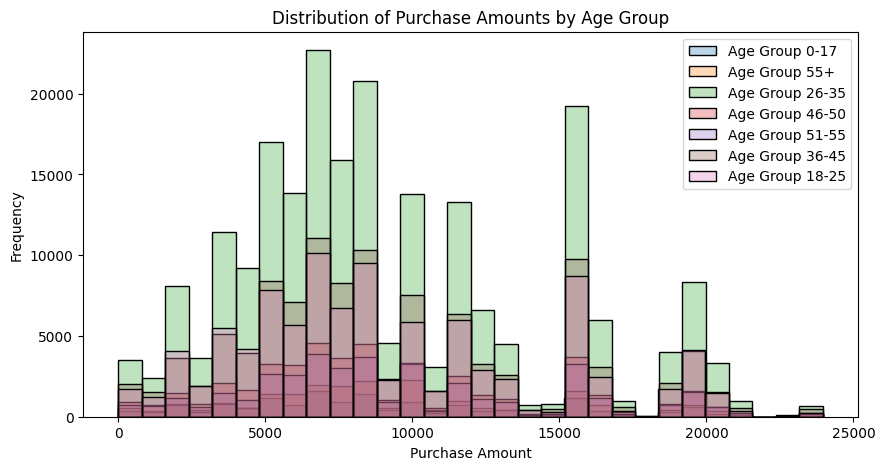

In [ ]:
# Age Groups
age_groups = df['Age'].unique()
ci_age = {}

for age in age_groups:
    age_purchase = df[df['Age'] == age]['Purchase']
    ci_age[age] = clt_ci(age_purchase)
    print(f"95% CI for age group {age}: {ci_age[age]}")

# Analysis
age_group_pairs = [(ci_age[age1], ci_age[age2]) for i, age1 in enumerate(age_groups) for age2 in age_groups[i+1:]]
ci_age_overlap = any([pair[0][0] <= pair[1][1] and pair[0][1] >= pair[1][0] for pair in age_group_pairs])
print(f"Do the confidence intervals for different age groups overlap? {ci_age_overlap}")

# Plotting
plt.figure(figsize=(10, 5))
for age in age_groups:
    sns.histplot(df[df['Age'] == age]['Purchase'], kde=False, bins=30, label=f'Age Group {age}', alpha=0.3)
plt.legend()
plt.title('Distribution of Purchase Amounts by Age Group')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()


**Insights:**

*Overlap:*

The confidence intervals for different age groups overlap, indicating no significant difference in the average amount spent across age groups.

*Recommendation:*

Walmart can apply uniform marketing strategies across all age groups, ensuring a broad appeal to all customers regardless of age.




**8. Recommendations**

---



*Based on the analysis, here are some recommendations for Walmart:*

*Gender-Neutral Promotions :* Since spending habits do not significantly differ between males and females, Walmart should create promotions that appeal to both genders equally.

*Inclusive Marketing Strategies :* The overlap in spending between married and unmarried customers suggests that marketing strategies should not heavily rely on marital status. Instead, promotions should be inclusive.

*Targeted Age Group Campaigns :* If specific age groups show distinct spending patterns, Walmart should develop age-targeted campaigns to maximize engagement and sales.

*Data-Driven Decision Making :* Continuously analyze customer data to identify emerging trends and adjust marketing strategies accordingly to stay relevant and competitive.

By implementing these recommendations, Walmart can enhance its customer engagement and drive sales growth more effectively.

**Conclusion**

---



This analysis provides valuable insights into the spending behavior of Walmart customers based on gender, marital status, and age. By understanding these patterns, Walmart can make data-driven decisions to improve customer satisfaction and increase sales.



---

